Graphs for Fig 4, model panels

Test noise: 1, 2, 4, 8, 16, 32, 64...

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from skmisc.loess import loess
from scipy.signal import find_peaks
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

#path_single = '../out_batch/batch_2023-04-10_22-05-20_UTGeff_NEW_single/'
#path_single = '../out_batch/batch_2023-04-10_22-14-18_DUAL_NEW_single/'
#path_multi = '../out_batch/batch_2023-04-09_19-29-34_UTGeff_NEW_multi/'
#path_multi = '../out_batch/batch_2023-04-10_10-10-25_DUAL_NEW_multi/'

#path_single = '../out_batch/batch_2023-04-21_07-36-35__MANUSCRIPT_DUAL_single/'
#path_multi = '../out_batch/batch_2023-04-20_15-16-53__MANUSCRIPT_DUAL_multi/'

path_single = '../out_batch/batch_2023-04-26_13-33-24__MANUSCRIPT_UTGeffnew_single/'
path_multi = '../out_batch/batch_2023-04-25_22-52-42__MANUSCRIPT_UTGeffnew_multi/'

s = 'c'

noise_levels = ['2.5', '5', '7.5', '10']

data_single_raw_s1 = pd.read_csv(path_single + 'auxin_profile_0_' + s + '.csv')

data_multi_raw_s1 = pd.read_csv(path_multi + 'auxin_profile_multiple_2.5_' + s + '.csv')
data_multi_raw_s2 = pd.read_csv(path_multi + 'auxin_profile_multiple_5_' + s + '.csv')
data_multi_raw_s3 = pd.read_csv(path_multi + 'auxin_profile_multiple_7.5_' + s + '.csv')
data_multi_raw_s4 = pd.read_csv(path_multi + 'auxin_profile_multiple_10_' + s + '.csv')
# Select first 13 rows only
data_single_raw_s1, data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4 = [i.head(13) for i in [data_single_raw_s1, data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4]]

# Give x values (cell row) to all datasets
data_x = np.linspace(1, len(data_single_raw_s1.index), len(data_single_raw_s1.index))
data_single_raw_s1['x'], data_multi_raw_s1['x'], data_multi_raw_s2['x'], data_multi_raw_s3['x'], data_multi_raw_s4['x'] = data_x, data_x, data_x, data_x, data_x

all_single_samples = [data_single_raw_s1]

all_multi_samples = [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4]

# Calculate mean and median of profiles replicates
all_means = [i.drop(columns=['x']).mean(axis=1) for i in all_multi_samples]
all_medians = [i.drop(columns=['x']).median(axis=1) for i in all_multi_samples]

In [375]:
data_single_raw_s1

,0,x
0,222.192816,1.0
1,245.620284,2.0
2,161.099612,3.0
3,117.099702,4.0
4,91.695829,5.0
5,75.689592,6.0
6,65.582606,7.0
7,59.252140,8.0
8,55.003113,9.0
9,51.793356,10.0


In [376]:
data_multi_raw_s1

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,x
0,215.118740,230.992219,208.853721,210.760603,219.073518,211.949346,245.121486,220.523339,226.026670,225.075719,...,226.134835,220.530452,222.821065,235.687473,222.297513,215.790010,223.881805,221.517997,231.864599,1.0
1,240.423616,245.428082,239.961378,240.911892,240.265808,241.958235,245.851771,249.931917,248.337064,245.342611,...,249.324965,240.373473,245.463771,249.550975,246.035248,248.466038,244.851192,248.327354,244.676264,2.0
2,184.503723,154.503743,168.299210,163.961781,177.507752,172.180504,171.928098,168.605762,165.170538,170.537236,...,157.742210,156.724396,170.624126,167.812812,185.449694,158.592587,160.259465,177.475293,159.027080,3.0
3,126.612649,110.038864,120.157570,112.983727,132.036803,123.505981,124.901094,116.737934,119.248247,109.251559,...,114.318904,110.409014,114.065618,119.350410,128.582208,111.011598,116.745356,118.895980,109.463867,4.0
4,94.478169,91.507818,92.088500,90.011648,98.806854,92.649711,89.838570,89.037225,95.579440,89.617177,...,94.794294,94.954073,90.735713,85.621788,104.369308,89.341334,91.637130,87.466206,87.942933,5.0
5,73.394211,78.493138,77.975619,77.903055,86.436744,72.571062,70.559715,74.357529,83.278739,70.949519,...,76.090258,80.765814,76.090138,77.032773,81.272281,69.729173,73.833766,75.707385,78.594669,6.0
6,63.844549,66.754716,60.081168,63.988901,65.861552,60.361134,64.096543,68.106561,76.149894,59.939391,...,66.462363,79.401707,63.693744,64.825435,69.250353,61.497409,65.275111,64.679191,67.457542,7.0
7,52.694713,61.827541,55.259648,58.073169,57.608194,52.574379,59.099227,75.786428,67.860490,52.000390,...,62.783475,70.440475,62.254124,61.127468,64.392283,56.968304,61.930346,60.971347,68.976405,8.0
8,53.642521,56.322300,51.195904,51.452899,51.483659,51.748363,57.770438,77.029577,63.179315,49.460112,...,55.076952,65.584439,61.376830,53.576117,56.925265,52.441957,55.312524,65.895075,61.916119,9.0
9,48.502150,52.464645,50.183457,46.843111,42.877556,51.246996,52.107157,72.924974,60.848401,47.978809,...,50.094256,53.312039,52.538384,47.411955,51.730105,56.587539,51.465687,66.989716,55.169598,10.0


In [377]:
# Make figure 2 (individual plots)

def make_individual_plot(sample_single=None, sample_multi=None, mean=None, x=data_x, loess=None):

    fig2, ax1 = plt.subplots(1,1, figsize=(3,4))

    #ax1.plot(sample_single['0'], sample_single['x'], color='blue', linestyle='--')

    for col in sample_multi.drop(columns=['x']):
        ax1.plot(sample_multi[col], sample_multi['x'], color='blue', alpha=.15)

    #ax1.fill_betweenx(loess['x'], loess['ymin'], loess['ymax'], alpha=.2, color='blue', linewidth=0)

    ax1.plot(mean, data_x, color='blue')

    ax1.set_yticks([1,4,7,10,13])
    ax1.invert_yaxis()
    plt.xlabel('[Auxin] A.U.')
    plt.ylabel('Cell row')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

    plt.show()

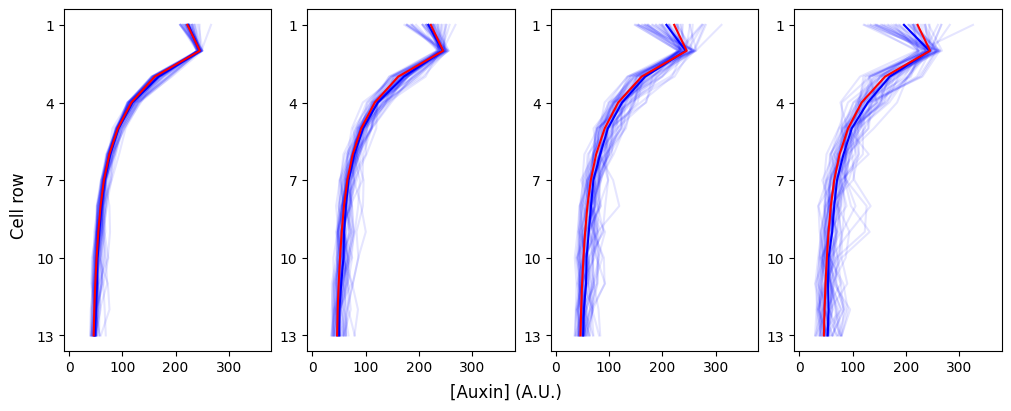

In [378]:
# Individual composite plot

fig3, axes = plt.subplots(1,4, figsize=(10,4), constrained_layout=True)
for data, ax in zip(all_multi_samples, axes.ravel()):
    for col in data.drop(columns=['x']):
        ax.plot(data[col], data['x'], color='blue', alpha=.1)
for mean, ax in zip(all_means, axes.ravel()):
    ax.plot(mean, data_x, color='blue')
for ax in axes.ravel():
    ax.plot(all_single_samples[0]['0'], data_x, color='red')
for ax in axes.ravel():    
    ax.set_yticks([1,4,7,10,13])
    ax.invert_yaxis()
    ax.set_xlim(-10,380)   
fig3.supxlabel('[Auxin] (A.U.)')
fig3.supylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

In [379]:
# Characterize peaks

# Iterate over samples and replicates and extract metrics from the auxin site(s) that form(s) on the margin           
all_peaks = pd.DataFrame(columns=['sample', 'replica', 'pos', 'amplitude'])

for sample_id, sample in enumerate(all_multi_samples):
    for replica in sample.drop(columns=['x']):

        # Find pos a value of cell row with lowest auxin
        min_val = sample[replica].min()
        
        peaks = list(find_peaks(sample[replica], height = 1, threshold = 1, distance = 1))
        if len(peaks[0]) == 0:
            pass
        if len(peaks[0]) == 1:
            peak_position = data_single_raw_s1['x'][peaks[0][0]] #peak_pos = sample['x'][peaks[0][0]]
            peak_height = peaks[1]['peak_heights'][0]
            all_peaks = all_peaks.append(pd.DataFrame({'sample': sample_id, 'replica': replica, 'pos': float(peak_position), 'amplitude': peak_height - min_val}, index=[0]), ignore_index=True)
        if len(peaks[0]) > 1:
            # Select peak with highest amplitude, excluding the peak that represents the tip of the leaf (cell row)
            # If distal auxin site (rows 0, 1, 2, 3) is detected as peak, remove it from the list of peaks. 
            if peaks[0][0] < 4:
                peaks[0] = np.delete(peaks[0], 0)
                peaks[1]['peak_heights'] = np.delete(peaks[1]['peak_heights'], 0)
            # Select highest peak
            max_height_value = np.amax(peaks[1]['peak_heights'])
            max_height_index = np.argmax(peaks[1]['peak_heights'])
            position = peaks[0][max_height_index]+1
            all_peaks = all_peaks.append(pd.DataFrame({'sample': sample_id, 'replica': replica, 'pos': float(position), 'amplitude': max_height_value - min_val}, index=[0]), ignore_index=True)
        
        troughs = list(find_peaks(-sample[replica], height = 1, threshold = 1, distance = 1))

#all_peaks['pos'] = all_peaks['pos'].astype(int)
all_peaks[all_peaks['sample'] == 0]

,sample,replica,pos,amplitude
0,0,0,2.0,193.596314
1,0,1,12.0,4.831496
2,0,2,2.0,194.029473
3,0,3,2.0,194.068781
4,0,4,2.0,197.403333
5,0,5,2.0,191.309727
6,0,6,12.0,5.843106
7,0,7,9.0,26.204508
8,0,8,2.0,199.228509
9,0,9,11.0,6.269449


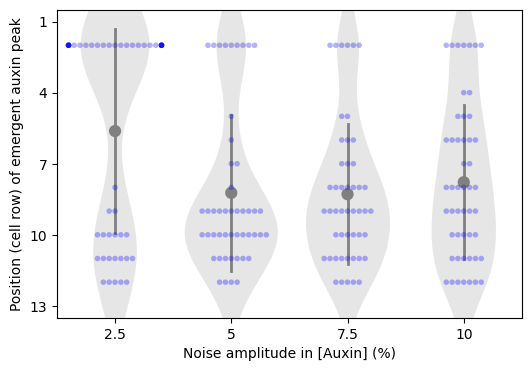

In [380]:

# Graph position and amplitude of peaks

all_peaks_wt = all_peaks[all_peaks['sample'] < 4]

fig4, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_ylim(.5, 13.5)
ax.invert_yaxis()
ax.set_yticks([1,4,7,10,13])
sns.violinplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, alpha=0.25, size=3, linewidth=0, color=(.9, .9, .9))
sns.pointplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, ci='sd', capsize=0, join=False, color='gray', scale=1, errwidth=2)
sns.swarmplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, alpha=0.3, color='blue', size=4)
ax.set_ylabel('Position (cell row) of emergent auxin peak')
ax.set_xlabel('Noise amplitude in [Auxin] (%)')
ax.set_xticklabels(noise_levels)
plt.show()

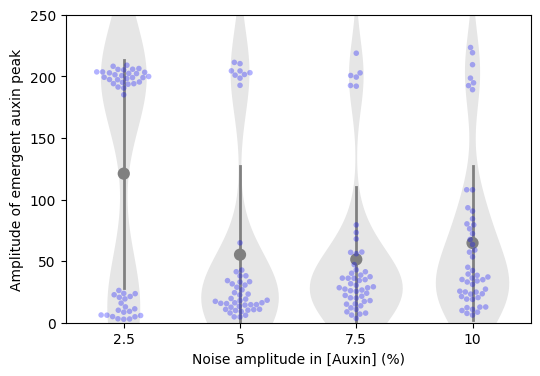

In [381]:
fig5, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_ylim(0, 250)
sns.violinplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.amplitude, alpha=0.3, size=3, linewidth=0, color=(.9, .9, .9))
sns.pointplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.amplitude, ci='sd', linewidth=0, capsize=0, join=False, color='gray', scale=1, errwidth=2)
sns.swarmplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.amplitude, alpha=0.3, color='blue', size=4)
ax.set_ylabel('Amplitude of emergent auxin peak')
ax.set_xlabel('Noise amplitude in [Auxin] (%)')
ax.set_xticklabels(noise_levels)
plt.show()